# Part 2: Analysis of diversity and inclusion topics on campus using The Wellesley News

**Thurs, Jan 28, 2021**

I am wanting to see how often discussion related to gender and racial diversity at Wellesley College is generated by the student body, and am using articles from 2013 through 2020 of the school newspaper as a way to understand this.
I want to see how frequently these topics come up in The Wellesley News, and in what contexts and categories of the newspaper. 

I want to also see how the frequency of this discussion changes, or does not change, over the years. My hypothesis is that the frequency will increase over the years. 

I am going to focus first on discussion around gender at Wellesley, and seeing if it has increased or decreased over the years. My hypothesis is that the discussion has increased over the years, and that the general sentiments expressed in these articles are negative.


**Table of contents**
1. [Creating the dataframe](#1)
2. [Analyzing discussion about gender and racial diversity](#2)
3. [Analyzing sentiment](#3)

### 1. Creating the dataframe <a id='1'></a>

First, let's use pandas and use the package to create the dataframe that we will use.  

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
df = pd.read_json("articleList.json") #wellesley news articles 2013 through 2020

Checking that the df represents the file's data correctly

In [4]:
df.head()

,title,authors,date,categories,url,body
0,"SELFIES ARE AN EXERCISE IN VANITY, NOT CONFIDENCE",[THEWELLESLEYNEWS],2013-12-05,[OPINIONS],https://thewellesleynews.com/2013/12/05/selfie...,By VICTORIA HILLS ’14 Co-Editor in Chief The w...
1,THE HOLIDAY MOVIES THAT WILL GET YOU THROUGH F...,[THEWELLESLEYNEWS],2013-12-04,"[FEATURES, NEWS AND FEATURES]",https://thewellesleynews.com/2013/12/04/the-ho...,By KRISTEN GREEN ’14 and MARIANA ZEPEDA ’14 Fe...
2,HONOR CODE COUNCIL FACILITATES HONOR CODE AWAR...,[THEWELLESLEYNEWS],2013-12-04,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2013/12/04/honor-...,By GRACE BALLENGER ’17 Contributing Writer by ...
3,COLLEGE TO HONOR RUTH NAGEL JONES ’42,[THEWELLESLEYNEWS],2013-12-04,"[FEATURES, NEWS AND FEATURES]",https://thewellesleynews.com/2013/12/04/colleg...,By KRISTEN GREEN ’14 Features Editor by Hannah...
4,THE ARTICHOKE: STUDENT VOWS TO REVOLUTIONIZE S...,[THEWELLESLEYNEWS],2013-12-04,"[FEATURES, NEWS AND FEATURES]",https://thewellesleynews.com/2013/12/04/the-ar...,By LARA AZAR ’15 Staff Columnist Citing newfou...


Getting the title of one article in order to learn how to index a pandas dataframe

In [5]:
df.loc[0, "title"]

'SELFIES ARE AN EXERCISE IN VANITY, NOT CONFIDENCE'

### 2. Analyzing discussion about gender and racial diversity <a id='2'></a>

In order to discern what articles might be about gender or racial diversity, I will select articles that contain words that I associate with gender and race based discussion at Wellesley.

**gender- related words:**
* transgender, pronouns, they/them, non-binary, trans, gender 

**"race"/ethnicity - related words:**
* latinx, POC, people of color, students of color


**general/other words:**
* diversity, inclusion, low-income

I'm going to also divide the articles into separate dataframes by year, so that it is easier to compare the articles by year.

In [6]:
df['date'] = pd.to_datetime(df['date']) #changing "date" column to datetime

In [7]:
#creating dataframes of the articles by year
articles20 = df[df['date'] >= '2020-01-01'] #2020
articles19 = df[(df['date'] >= '2019-01-01') & (df['date'] < '2020-01-01')] #2019
articles18 = df[(df['date'] >= '2018-01-01') & (df['date'] < '2019-01-01')]#2018
articles17 = df[(df['date'] >= '2017-01-01') & (df['date'] < '2018-01-01')] #2017
articles16 = df[(df['date'] >= '2016-01-01') & (df['date'] < '2017-01-01')] #2016
articles15 = df[(df['date'] >= '2015-01-01') & (df['date'] < '2016-01-01')] #2015
articles14 = df[(df['date'] >= '2014-01-01') & (df['date'] < '2015-01-01')] #2014
articles13 = df[(df['date'] >= '2013-01-01') & (df['date'] < '2014-01-01')] #2013

All of the articles, organized by year:

In [8]:
articlesByYear = [articles13, articles14, articles15, articles16, articles17, articles18,articles19, articles20]

Let's make sure the articles were separated correctly by checking articles from 2020.

In [9]:
articles20.head(3)

,title,authors,date,categories,url,body
2915,STUDENTS WITH MEDICALLY RESTRICTED DIETS STRUG...,[MACY LIPKIN],2020-12-25,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2020/12/25/studen...,“I know I’m speaking from a place of privilege...
2916,STUDENTS FIND NEW WAYS TO CELEBRATE DIWALI,"[JYONTIKA KAPOOR, MARYAM AHMAD]",2020-12-21,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2020/12/21/studen...,"The week before Thanksgiving break, 52 seconda..."
2917,MUSIC PERFORMANCE COURSES ADAPT TO AN ALTERED ...,[MOLLY MCCAUL],2020-12-14,[ARTS],https://thewellesleynews.com/2020/12/14/music-...,"Fall 2020, objectively, has created unique sce..."


As we can see, the row indexes do not start at 0, since they are showing the indexes that they possessed in the original data frame, df. I'll change this so each data frame starts at index 0, so that they are easier to iterate through later on. 

In [10]:
#creates list of indexes for data frame based on its size, and then updates its indices accordingly
def setIndices(df): 
    num_rows = len(df)
    new_indices = list(range(0, num_rows))
    df.index = new_indices

I'll also reverse the order of the rows in the dataframe in order to make the dataframes more intuitive to work with. 
Currently, the articles are organized in reverse chronological order of publishing date, but I want the articles to be organized such that they are in chronological order. 

Here's an example:

In [11]:
articles20 = articles20.iloc[::-1]
articles20.head(3)

,title,authors,date,categories,url,body
3119,ATHLETICS UPDATE 2/12/2020,[MARISA PAPAGELIS],2020-02-12,"[ATHLETICS UPDATE, SPORTS AND WELLNESS]",https://thewellesleynews.com/2020/02/12/athlet...,"Fencing Last Sunday, Wellesley Fencing posted ..."
3118,ASK WENDY AND WANDA: WHAT SHOULD I DO WHEN I R...,[KATHRYN CROSS],2020-02-12,"[MISCELLANEA, WENDY AND WANDA]",https://thewellesleynews.com/2020/02/12/ask-we...,"Dear Wendy and Wanda, What should I do when I ..."
3117,UNHEALTHY LATE NIGHT DINING OPTIONS POSE DIFFI...,[KATHARINE TRACY],2020-02-12,[SPORTS AND WELLNESS],https://thewellesleynews.com/2020/02/12/unheal...,"In theory, Wellesley Fresh’s Late Night option..."


In [12]:
setIndices(articles20)

In [13]:
articles20.head(3)

,title,authors,date,categories,url,body
0,ATHLETICS UPDATE 2/12/2020,[MARISA PAPAGELIS],2020-02-12,"[ATHLETICS UPDATE, SPORTS AND WELLNESS]",https://thewellesleynews.com/2020/02/12/athlet...,"Fencing Last Sunday, Wellesley Fencing posted ..."
1,ASK WENDY AND WANDA: WHAT SHOULD I DO WHEN I R...,[KATHRYN CROSS],2020-02-12,"[MISCELLANEA, WENDY AND WANDA]",https://thewellesleynews.com/2020/02/12/ask-we...,"Dear Wendy and Wanda, What should I do when I ..."
2,UNHEALTHY LATE NIGHT DINING OPTIONS POSE DIFFI...,[KATHARINE TRACY],2020-02-12,[SPORTS AND WELLNESS],https://thewellesleynews.com/2020/02/12/unheal...,"In theory, Wellesley Fresh’s Late Night option..."


Now I'll reverse the order and update the indices of all the article dataframes

In [14]:
#updating articlesByYear
for articles in articlesByYear: 
    articles = articles.iloc[::-1]
    setIndices(articles)

#updating individual sets of articles
setIndices(articles13)
setIndices(articles14)
setIndices(articles15)
setIndices(articles16)
setIndices(articles17)
setIndices(articles18)
setIndices(articles19)
setIndices(articles20)

Checking that it worked

In [15]:
articles13.head(3)

,title,authors,date,categories,url,body
0,"SELFIES ARE AN EXERCISE IN VANITY, NOT CONFIDENCE",[THEWELLESLEYNEWS],2013-12-05,[OPINIONS],https://thewellesleynews.com/2013/12/05/selfie...,By VICTORIA HILLS ’14 Co-Editor in Chief The w...
1,THE HOLIDAY MOVIES THAT WILL GET YOU THROUGH F...,[THEWELLESLEYNEWS],2013-12-04,"[FEATURES, NEWS AND FEATURES]",https://thewellesleynews.com/2013/12/04/the-ho...,By KRISTEN GREEN ’14 and MARIANA ZEPEDA ’14 Fe...
2,HONOR CODE COUNCIL FACILITATES HONOR CODE AWAR...,[THEWELLESLEYNEWS],2013-12-04,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2013/12/04/honor-...,By GRACE BALLENGER ’17 Contributing Writer by ...


In [16]:
articles20.tail(3)

,title,authors,date,categories,url,body
202,MUSIC PERFORMANCE COURSES ADAPT TO AN ALTERED ...,[MOLLY MCCAUL],2020-12-14,[ARTS],https://thewellesleynews.com/2020/12/14/music-...,"Fall 2020, objectively, has created unique sce..."
203,STUDENTS FIND NEW WAYS TO CELEBRATE DIWALI,"[JYONTIKA KAPOOR, MARYAM AHMAD]",2020-12-21,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2020/12/21/studen...,"The week before Thanksgiving break, 52 seconda..."
204,STUDENTS WITH MEDICALLY RESTRICTED DIETS STRUG...,[MACY LIPKIN],2020-12-25,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2020/12/25/studen...,“I know I’m speaking from a place of privilege...


Now that the articles are organized by year and are cleaned up, I'm going to see how often gender and race keywords are mentioned in the articles. This is useful for seeing how focused on gender or race an article actually is. 

In [17]:
#The gender and race related topics listed above
words = ["transgender", "pronouns", "they/them", "non-binary", "trans", \
         "gender", "latinx", "POC", "people of color", "students of color", 
         "diversity", "inclusion", "low-income" 
        ] 

In [18]:
import collections
import string

In [19]:
#returns a dictionary containing the count of how often certain words (words in wordsList)
#occur within a list of articles
#articlesDf should be a pandas data frame, and  wordsList a list of words 
def getCount(articlesDf, wordsList):
    count = collections.Counter()
    for index, article in enumerate(articlesDf.values):
        body = articlesDf.iloc[index]['body']
        body = body.lower() #removing capitalization
        
        #removing punctuation using string module
        body.translate(str.maketrans('', '', string.punctuation))
        body_words = body.split(" ")
        
        #updating counter
        count.update(body_words)
        
    #only return words we are interested in 
    filtered_count = {word: num_words for word, num_words in count.items() if word in wordsList}
    #but also return the words that don't occur but that are in the word list, with a count of 0 for them
    for word in wordsList: 
        key = word
        filtered_count[key] = filtered_count.get(key, 0) 
        

    return filtered_count 

Now, I will get the frequency of word occurrence by year 

In [20]:
#now, getting the frequencies for all of the articles-by-year dataframes.
freq_by_year = {} #it will be a dictionary of dictionaries
year = "2013"; 
for articles in articlesByYear: 
    freq_by_year[year] = getCount(articles, words)
    #update year 
    year = year[0:2] + str(int(year[2:4])+1)

It should be a dictionary of dictionaries of how often the topics popped up in articles per year. These numbers are basically the total of often the topic/word occurred in the articles for a given year. 

In [21]:
freq_by_year

{'2013': {'gender': 26,
  'trans': 3,
  'diversity': 10,
  'low-income': 11,
  'inclusion': 2,
  'transgender': 0,
  'pronouns': 0,
  'they/them': 0,
  'non-binary': 0,
  'latinx': 0,
  'POC': 0,
  'people of color': 0,
  'students of color': 0},
 '2014': {'diversity': 56,
  'trans': 62,
  'gender': 124,
  'inclusion': 14,
  'non-binary': 1,
  'transgender': 18,
  'low-income': 22,
  'pronouns': 2,
  'they/them': 0,
  'latinx': 0,
  'POC': 0,
  'people of color': 0,
  'students of color': 0},
 '2015': {'low-income': 18,
  'diversity': 68,
  'gender': 130,
  'inclusion': 17,
  'trans': 91,
  'transgender': 20,
  'non-binary': 24,
  'pronouns': 2,
  'they/them': 0,
  'latinx': 0,
  'POC': 0,
  'people of color': 0,
  'students of color': 0},
 '2016': {'gender': 53,
  'diversity': 99,
  'trans': 8,
  'inclusion': 22,
  'latinx': 16,
  'low-income': 10,
  'transgender': 17,
  'pronouns': 0,
  'they/them': 0,
  'non-binary': 0,
  'POC': 0,
  'people of color': 0,
  'students of color': 0},


But what would be more interesting and useful to find out is the number of articles these words were used in
and whether that increased over the years, rather than how frequently these words occurred, since they can occur ten times in one article but that does not indicate that there was more discussion around diversity and inclusivity more than if there was another article from another year that used these words only eight times. 
So let's find out the number of articles per year that had these words in them. I'll first focus on words related to gender discussion at Wellesley. 

In [22]:
gender_words = ["transgender", "pronouns", "they/them", "non-binary", "trans", "gender"] 

In [23]:
#returns the number of articles that have words from a given list of words (wordList) in them. 
#articlesDf should be dataframe, wordsList a list of words
def getNumArticles(articlesDf, wordsList): 
    numArticles = 0
    for index, article in enumerate(articlesDf.values):
        count = collections.Counter()
        body = articlesDf.iloc[index]['body']
        body = body.lower() #removing capitalization
        
        #removing punctuation using string module
        body.translate(str.maketrans('', '', string.punctuation))
        body_words = body.split(" ")
        
        #updating counter
        count.update(body_words)
        
        #now see if any of the words are contained in the articles. if so, add to the numArticles.    
        for word in wordsList: 
            numWords = count.get(word, 0) 
        if (numWords > 0): 
            numArticles += 1 
    return numArticles 

Now, let's get the number of articles with these keywords, by year.

In [24]:
num_articles = {} #it will be a dictionary of dictionaries
year = "2013"; 
for articles in articlesByYear: 
    num_articles[year] = getNumArticles(articles, gender_words)
    #update year 
    year = year[0:2] + str(int(year[2:4])+1)

In [25]:
num_articles

{'2013': 12,
 '2014': 49,
 '2015': 44,
 '2016': 25,
 '2017': 31,
 '2018': 42,
 '2019': 26,
 '2020': 9}

Let's also get these articles' information so that we can explore them later and look for patterns. 

In [26]:
#returns the info of the articles that have words from a given list of words in them. 
#returns them in a data frame. 
def getArticles(articlesDf, wordsList): 
    articles = articlesDf
    for index, article in enumerate(articlesDf.values):
        count = collections.Counter()
        body = articlesDf.iloc[index]['body']
        body = body.lower() #removing capitalization
        
        #removing punctuation using string module
        body.translate(str.maketrans('', '', string.punctuation))
        body_words = body.split(" ")
        
        #updating counter
        count.update(body_words)
        
        #now see if any of the words are contained in the articles. if so, add to the numArticles.    
        for word in wordsList: 
            numWords = count.get(word, 0) 
        if (numWords == 0): 
            articles = articles.drop(index) 
            
    return articles 

Let's test. Should be a length of 12, according to num_articles. 

In [27]:
len(getArticles(articles13, gender_words))

12

In [28]:
gender13 = getArticles(articles13, gender_words)

In [29]:
gender13.head()

,title,authors,date,categories,url,body
6,INTERNATIONAL MEN’S DAY COULD BE USED TO PROMO...,[THEWELLESLEYNEWS],2013-12-04,[OPINIONS],https://thewellesleynews.com/2013/12/04/intern...,By SRAVANTI TEKUMALLA ’16 Online Editor Graphi...
11,"SIX WEEKS, FOUR PLAYS: THEATRE STUDIES CLASS T...",[THEWELLESLEYNEWS],2013-12-04,"[ARTS, REVIEWS]",https://thewellesleynews.com/2013/12/04/six-we...,By KAT MALLARY ’17 Assistant Arts Editor by H...
30,NUMBER OF STUDENTS MAJORING IN STEM FIELDS INC...,[THEWELLESLEYNEWS],2013-11-20,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2013/11/20/number...,By GRACE BENNETT-PIERRE ’16 Contributing Write...
74,LETTER TO THE EDITOR,[THEWELLESLEYNEWS],2013-11-13,"[LETTERS TO THE EDITOR, OPINIONS]",https://thewellesleynews.com/2013/11/13/letter...,In response to the recent Wellesley News artic...
76,WELLESLEY TO HOST SEVEN SISTERS CONFERENCE NEX...,[THEWELLESLEYNEWS],2013-11-09,"[NEWS, NEWS AND FEATURES]",https://thewellesleynews.com/2013/11/09/welles...,Attendees depart this year’s conference somewh...


Now let's get all the articles that mention the given gender-based topics.

In [30]:
#articles for 2013 already done above
gender14 = getArticles(articles14, gender_words)#2014
gender15 = getArticles(articles15, gender_words)
gender16 = getArticles(articles16, gender_words)
gender17 = getArticles(articles17, gender_words)
gender18 = getArticles(articles18, gender_words)
gender19 = getArticles(articles19, gender_words)
gender20 = getArticles(articles20, gender_words)
genderByYear = [gender13,gender14, gender15, gender16, gender17,gender18, gender19, gender20]

#### Visualizing the Data

Now that we got some interesting data to work with, let's work with it! My prediction is that words related to gender will pop up more over the years, especially around 2016 and 2017, 
since Wellesley started accepting applications from trans women in fall 2016
and had its first transgender woman enroll in the fall of 2017. 

Let's plot the gender and race keywords' occurrence by year and see how they compare across the years.

In [31]:
#Importing seaborn
%matplotlib inline 
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [32]:
#Seaborn uses dataframes, so I'm creating a dataframe for freq_by_year. 
df2 = pd.DataFrame(freq_by_year)
#transpose the dataframe
df2 = df2.T
df2.index.name = "years"
df2

,gender,trans,diversity,low-income,inclusion,transgender,pronouns,they/them,non-binary,latinx,POC,people of color,students of color
years,,,,,,,,,,,,,
2013,26,3,10,11,2,0,0,0,0,0,0,0,0
2014,124,62,56,22,14,18,2,0,1,0,0,0,0
2015,130,91,68,18,17,20,2,0,24,0,0,0,0
2016,53,8,99,10,22,17,0,0,0,16,0,0,0
2017,44,21,58,12,13,8,2,0,3,24,0,0,0
2018,77,35,39,19,33,31,6,2,1,35,0,0,0
2019,51,25,25,29,23,11,1,0,12,4,0,0,0
2020,25,14,27,11,17,38,2,0,2,9,0,0,0


A better way to visualize how often these words are used would be to create a bar plot

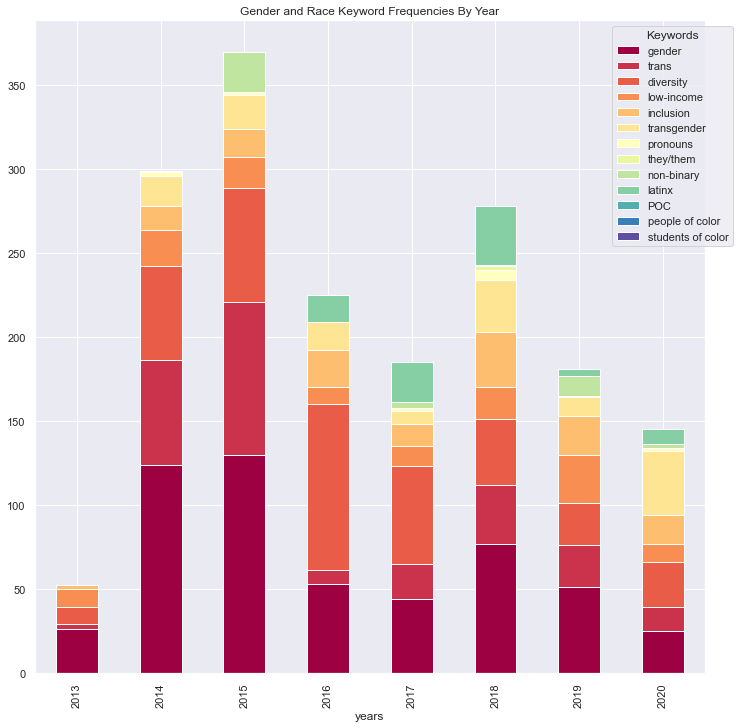

In [33]:
sns.set()

import matplotlib.pyplot as plt
from matplotlib import cm
cmap = cm.get_cmap('Spectral') # Colour map (there are many others)

#figure size
fig_dims = (12, 12)
fig, ax = plt.subplots(figsize=fig_dims)



df2.plot(kind='bar', stacked=True, cmap=cmap, ax=ax, title='Gender and Race Keyword Frequencies By Year')
plt.legend(title='Keywords', bbox_to_anchor=(1.05, 1), )

As the barchart shows, some words are used a lot, such as "gender", while some that are used a lot in daily life at Wellesley in discussion, such as in daily life at Wellesley, are not used much in the articles, such as the word "pronouns". I think gender is probably used a lot since it's a generic word that can encompasses all **_gender_** based discussions at Wellesley. (See what I did there?:)

Text(0.5, 1.0, 'The number of times the word "Gender" was used, by year')

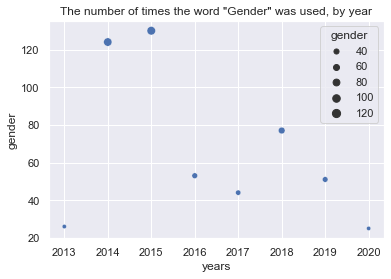

In [34]:
gender_count = sns.scatterplot(x='years', y='gender', size='gender', data=df2)
plt.title('The number of times the word "Gender" was used, by year')

But, wait.......

Alas, what matters more perhaps is whether the **number of articles** relating to gender and race increased. Let's see if the number of articles related to gender topics increased by examining num_articles. 

In [35]:
#creating dataframe for num_articles
df3 =  pd.DataFrame(num_articles, index=["count"]) 
#transpose the dataframe
df3 = df3.T
df3.index.name = "years"
df3

,count
years,
2013,12
2014,49
2015,44
2016,25
2017,31
2018,42
2019,26
2020,9


Text(0.5, 1.0, 'Number of WNews articles that contain diversity and inclusion related keywords')

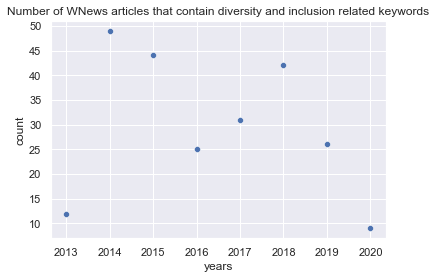

In [36]:
sns.scatterplot(x='years', y='count',  data=df3)
plt.title('Number of WNews articles that contain diversity and inclusion related keywords')

Interestingly, gender is mentioned more in 2015 and 2018 that it is in 2016 and 2017, when Wellesley became more inclusive of trans students through policy change. I wonder what these articles from 2015 and 2018 are about. Let's see:

In [37]:
#Articles from 2015 that contain gender keywords
pd.set_option('display.max_colwidth', -1)
gender15titles = gender15.loc[:, "title"]
setIndices(gender15titles)
gender15titles

0     NEWS IN BRIEF: 11/18                                                                             
1     PROFESSOR STUDIES INTERDISCIPLINARY TOPICS IN HEALTH AND SOCIETY                                 
2     NEW STUDY EXPLORES IN-CLASS ARGUMENT HABITS                                                      
3     “THE LAST MATCH” AND DAVID WILLIAM FOSTER LECTURE SHINE A LIGHT ON LGBTQ ISSUES IN CUBAN CINEMA  
4     GENDER GAPS EXIST IN THE STUDENT DEBT CRISIS                                                     
5     U.S. AMBASSADOR TO PORTUGAL SPEAKS AT WELLESLEY                                                  
6     TAKE AWAY THOSE GUNS AND BRING OUT THE DILDOS                                                    
7     STRUT LIKE YOU MEAN IT: FREE YOURSELF FROM SEXUAL STIGMA                                         
8     EDITORIAL: THE WELLESLEY EFFECT PRESENTS EXCITING OPPORTUNITIES FOR FUTURE GENERATIONS           
9     REBECA MAULEÓN CELEBRATES AFRO-CUBAN JAZZ WITH WELLESLEY  

In [38]:
#Articles from 2018 that contain gender keywords
gender18titles= gender18.loc[:, "title"]
setIndices(gender18titles)
gender18titles

0     BODY WORSHIP IS NOT WORKING FOR VICTORIA’S SECRET ANYMORE                                        
1     WOMEN AT WELLESLEY BREAK GLASS CEILING AT RELIGIOUS INSTITUTIONS                                 
2     NEWS IN BRIEF 11/28/18                                                                           
3     FRENCH TEACHING ASSISTANT JULIE MAYANS INTEGRATES HERSELF INTO STUDENT LIFE ON CAMPUS            
4     THE PATCHWORK QUILT OF DEMOCRATIC AMERICA                                                        
5     TITLE IX PROTECTS THOSE WHO EMILY YOFFE AND WELLESLEY COLLEGE DISEMPOWER                         
6     TAYLOR SWIFT GETS BRILLIANT IN A BEAUTIFUL PR MOVE                                               
7     IN SUPPORT OF THE TRANSGENDER COMMUNITY                                                          
8     “FIRST MAN” TAKES YOU OUT OF THIS WORLD — BUT CAN’T QUITE JUSTIFY WHY WE WENT THERE              
9     PROFESSOR CATIA CONFORTINI STUDIES PEACE AND JUSTICE THROU

The articles don't seem to be largely about campus policies or events. Topics seem to range from 
understanding scholarly studies,popular culture, and social issues. Some are related to gender inclusivity at wellesley and gender-related campus discussion and the change in policy, though:

In [39]:
gender15titles.iloc[[1, 5, 8, 12,29, 30, 31, 32, 33, 34, 35, 36, 38, 42]]

1     PROFESSOR STUDIES INTERDISCIPLINARY TOPICS IN HEALTH AND SOCIETY                      
5     U.S. AMBASSADOR TO PORTUGAL SPEAKS AT WELLESLEY                                       
8     EDITORIAL: THE WELLESLEY EFFECT PRESENTS EXCITING OPPORTUNITIES FOR FUTURE GENERATIONS
12    GENDER IDENTITY ORGANIZATIONS EMERGE AT WELLESLEY                                     
29    AMNESTY INTERNATIONAL HOSTS SECOND INTERNATIONAL WOMEN’S DAY EVENT                    
30    WELLESLEY ADMISSIONS POLICY MUST CONSIDER ALL NON-BINARY INDIVIDUALS FOR ADMISSION    
31    WELLESLEY TO ACCEPT APPLICATIONS FROM TRANS WOMEN                                     
32    WELLESLEY OFFICIALLY WELCOMES APPLICATIONS FROM TRANS WOMEN                           
33    WELLESLEY MUST CHALLENGE STIGMA BY INCLUDING TRANS STUDENTS IN CAMPUS COMMUNITY       
34    ARQUETTE’S SPEECH IGNORES HARDSHIPS OF MARGINALIZED GROUPS                            
35    WELLESLEY 20/20 PETITIONS FOR TRANS-INCLUSIVE ADMISSIONS POLICY 

In [40]:
gender18titles.iloc[[5, 7, 9,10, 30, 33,34, 39  ]]

5     TITLE IX PROTECTS THOSE WHO EMILY YOFFE AND WELLESLEY COLLEGE DISEMPOWER                         
7     IN SUPPORT OF THE TRANSGENDER COMMUNITY                                                          
9     PROFESSOR CATIA CONFORTINI STUDIES PEACE AND JUSTICE THROUGH LENS OF FEMINISM                    
10    LGBTQIA+ ORGANIZATIONS AND RESOURCES CREATE SAFE SPACES AT WELLESLEY                             
30    PROFESSOR MATA COMBINES LOVE OF LITERATURE WITH COMMITMENT TO GENDER EQUITY                      
33    TOWN HALL ON INCLUSIVE EXCELLENCE WEDNESDAY, FEBRUARY 28, 2018 SPEECH BY ANJALI BENJAMIN-WEBB ’18
34    TRANSGENDER WRESTLER RAISES QUESTIONS ABOUT FAIRNESS AND EQUALITY                                
39    ALICE DREGER’S SPEECH INCITES PROTEST FROM WELLESLEY’S TRANSGENDER COMMUNITY AND ALLIES          
Name: title, dtype: object

pd.reset_option('^display.', silent=True)

### 3. Analyzing sentiment <a id='3'></a>

I'm curious to see what the tone is of the articles that are about gender. Wellesley students are very vocal, 
and many love to voice their critiques, so I hypothesis that these articles will have negative tones. Let's use Textblob's sentiment analysis. (Reference: https://textblob.readthedocs.io/en/dev/quickstart.html )

In [41]:
from textblob import TextBlob

Let's test TextBlob's sentiment analysis on one article first to see how it works. 

In [42]:
gender18.iloc[5, 0]

'TITLE IX PROTECTS THOSE WHO EMILY YOFFE AND WELLESLEY COLLEGE DISEMPOWER'

It seems to be a negative article based on its name.

In [43]:
article1 = gender18.iloc[5,5]

In [44]:
blob1 = TextBlob(article1)

In [45]:
print(blob1.sentiment)

Sentiment(polarity=0.19176160851657548, subjectivity=0.561203472759764)


Wow! The statement is slightly positive according to Textblob, and is more factual than not.
I wonder if it is actually factual, or if was written in a way to seem factual when it actually isn't.  
I am wondering this since I know that Wellesley students have excellent rhetorical skills on average. 

I am interested in seeing the sentiments for the different articles over the years and seeing how they differ.
Let's see!

In [46]:
#returns sentiments for a group of articles. 
def setPolarity(articlesDf):
    polarity = [] #default value is 0 for now
    for index, article in enumerate(articlesDf.values):
        body = articlesDf.iloc[index]['body']
        blob = TextBlob(body)
        polarity.append(blob.sentiment.polarity)
        
    articlesDf['polarity'] = polarity
    return polarity

Let's add the sentiments to the 2013 articles related to gender. 

In [47]:
polaritiesByYear = []  #list of lists
for articles in genderByYear: #articles by year
    polaritiesByYear.append(setPolarity(articles))  

In [48]:
import statistics
meansPolarity =[]
for polarityList in polaritiesByYear: 
    meansPolarity.append(statistics.mean(polarityList))

In [49]:
meansPolarity

[0.1115494721154156,
 0.12639077938195192,
 0.12405708678241739,
 0.09600749622777115,
 0.11274189333732014,
 0.11423436214113822,
 0.11410131722423458,
 0.1304601520455109]

Text(25.125, 0.5, 'textblob polarity values')

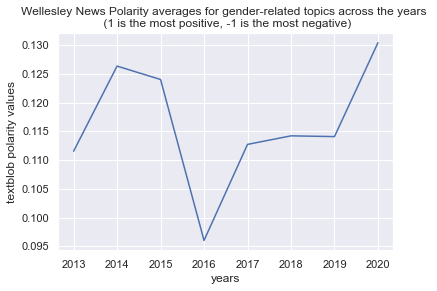

In [50]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig.canvas.draw()
labels = [ 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


ax.set_xticklabels(labels)


plt.plot(meansPolarity)
plt.title('Wellesley News Polarity averages for gender-related topics across the years \n (1 is the most positive, -1 is the most negative)')
plt.xlabel('years')
plt.ylabel('textblob polarity values')


It's interesting that the polarity value is lowest in the year that gender inclusive policy changes were being 
implemented (2016).Overall, the tones of the articles are slightly positive and vary very little.

Let's now examine the subjectivity measurements. 

In [51]:
#returns sentiments for a group of articles. 
def setSubjectivity(articlesDf):
    subjectivity = [] #default value is 0 for now
    for index, article in enumerate(articlesDf.values):
        body = articlesDf.iloc[index]['body']
        blob = TextBlob(body)
        subjectivity.append(blob.sentiment.subjectivity)
        
    articlesDf['subjectivity'] = subjectivity
    return subjectivity  

In [52]:
subjectivitiesByYear = []  #list of lists 
for articles in genderByYear: #articles by year
    subjectivitiesByYear.append(setSubjectivity(articles))

In [53]:
import statistics
meansSubjectivity =[]
for subjectivityList in subjectivitiesByYear: 
    meansSubjectivity.append(statistics.mean(subjectivityList)) 

In [54]:
meansSubjectivity

[0.4070457694650084,
 0.436728109300239,
 0.43650290293071936,
 0.41511322232930803,
 0.42707743025455347,
 0.43177108195866265,
 0.4578523757548305,
 0.4792129425519813]

Text(25.125, 0.5, 'textblob subjectivity values')

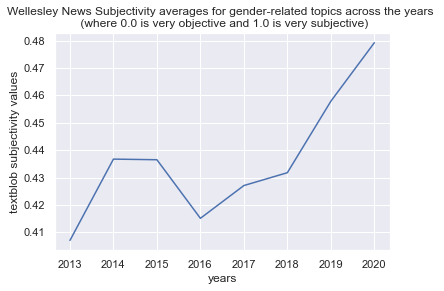

In [55]:
import matplotlib.pyplot as plt2
fig2, ax2 = plt2.subplots()
# We need to draw the canvas, otherwise the labels won't be positioned and 
# won't have values yet.
fig2.canvas.draw()
labels = [ 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


ax2.set_xticklabels(labels)


plt2.plot(meansSubjectivity)
plt2.title('Wellesley News Subjectivity averages for gender-related topics across the years \n (where 0.0 is very objective and 1.0 is very subjective)')
plt2.xlabel('years')
plt2.ylabel('textblob subjectivity values')

It's really interesting that the articles became more subjective from 2016 to 2020. But maybe it's not as interesting as it seems when you consider that the y-axis scale is from .41 to .48

# Just for fun

This makes me curious what the overall polarity 
and subjectivity scores are for all Wellesley News articles for comparison. Let's see. 

In [56]:
articleSubByYear = []  #list of lists 
for articles in articlesByYear: #articles by year
    articleSubByYear.append(setSubjectivity(articles))
    

meanSubByYear =[]
for subjectivityList in articleSubByYear: 
    meanSubByYear.append(statistics.mean(subjectivityList)) 

In [57]:
articlePolByYear = []  #list of lists
for articles in articlesByYear: #articles by year
    articlePolByYear.append(setPolarity(articles)) 
    
    
meanPolByYear =[]
for subjectivityList in articlePolByYear: 
    meanPolByYear.append(statistics.mean(subjectivityList)) 

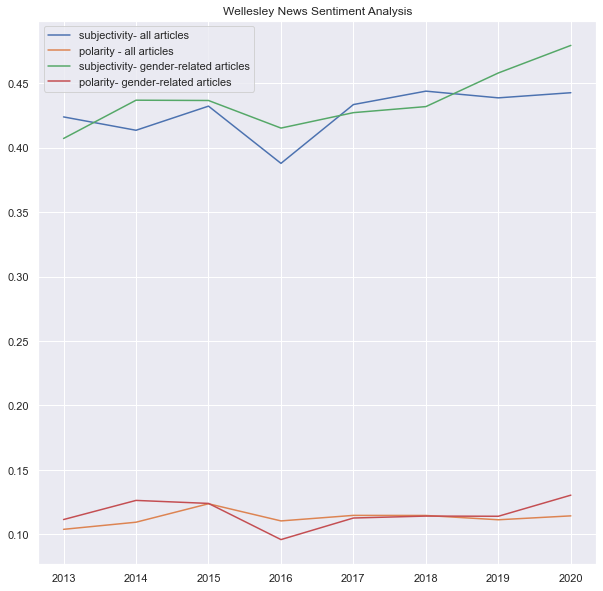

In [58]:
import matplotlib.pyplot as plt3
from matplotlib.pyplot import figure

years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

figure(figsize=(10,10))
plt3.plot(years, meanSubByYear, label = "subjectivity- all articles" ) 
plt3.plot(years, meanPolByYear, label = "polarity - all articles")
plt3.plot(years, meansSubjectivity, label = "subjectivity- gender-related articles")
plt3.plot(years, meansPolarity, label = "polarity- gender-related articles")


plt3.title('Wellesley News Sentiment Analysis')
plt3.legend(loc='best')
plt3.show()

How postive and how factual the articles are does not seem to differ much for all articles versus the articles 
related to gender.

# Main Insights

It is interesting how the number of articles that mentioned diversity and inclusion based topics greatly differed over the years. It is also interesting that the articles related to gender seem to be slightly positive, despite many of them seeming to be critical. 

# Weaknesses of Analysis

The major weaknesses of my current analysis is: 
1. I am not sure how to best accurately select the articles that are about race and gender. I am not sure if my way
is very accurate. It seems to be, by glancing over the data frame, but this is a subjective determination of accuracy.
I would try to come up with a more accurate way to select articles if I had extra time.

2. I am not sure how accurate Textblob's sentiment analysis is. I would probably clean up the articles of words that aren't needed for sentiment analysis (i.e. "a", "the", "and", ....) to try to make the sentiment analysis values more accurate, if I had more time.

# Future work

If I had more time to work on this inquiry, I would do a few things. 
1. I would look into what categories these articles about gender fall into. Are they mainly opinions articles?
   I would also clean up the article bodies of their filler words so that the textblob sentiment analysis 
   might be more accurate, since I heard that it is not very accurate.
2. I would also explore the articles relating to race, and would compare them to those that are about gender in terms
   of frequency and sentiment. 
3. I would use OCR (Optical Character Recognition) to scrape the Wellesley News Archive. I think the true magic of  
   comparing diversity and inclusion discussion at Wellesley would lie
   in comparing the Wellesley News articles over the past 100 years instead of solely the past 7 to 8. I would like
   to see whether these topics were as popular at Wellesley 100 years ago, when these discussions about gender and 
   race inclusion were likely completely different in number and content compared to today.
4. I would also fix my code to figure out how to count words with spaces: "people of color", "students of color", since I realized that getNumArticles does not count them due to the way I split the article body in there. 